<div style="text-align:center">
  <img src="https://enorcerna.com/wiki/wp-content/uploads/2021/04/enfermedades-cardiovasculares-social-1024x538.jpg" alt="Heart Image" />
</div>

- One of India's multispecialty hospitals provided this data on heart disease.
- Over 14 common features which makes it one of the heart disease dataset available so far for research purposes Using a cohort of 1000 subjects and 12 distinct features.
- This dataset is essential for building predictive machine-learning models and creating early-stage heart disease detection techniques.
- Datset Source - [Mendeley Data: Cardiovascular Disease Dataset](https://data.mendeley.com/datasets/dzz48mvjht/1)

# Cardiovascular Dataset Description

| Attribute                     | Assigned Code                            | Unit  | Type of the Data |
|---|---|---|---|
| Patient Identification Number                 | patientid                         | Number                          | Numeric |
| Age                                           | age                               | In Years                        | Numeric |
| Gender                                        | gender                            | 0 (female) / 1 (male)        | Binary |
| Chest pain type                               | chestpain                         | 0 (typical angina) <br> 1 (atypical angina) <br> 2 (non-anginal pain) <br> 3 (asymptomatic) | Nominal |
| Resting blood pressure                        | restingBP                         | 94 - 200 (in mm HG)               | Numeric |
| Serum cholesterol                             | serumcholestrol                   | 126 - 564 (in mg/dl)              | Numeric |
| Fasting blood sugar                           | fastingbloodsugar                 | 0 (false) / 1 (true) > 120 mg/dl                | Binary<br> |
| Resting electrocardiogram results             | restingrelectro                   | 0 (normal) <br> 1 (ST-T wave abnormality) <br>2 (probable or definite left ventricular hypertrophy) | Nominal |
| Maximum heart rate achieved                   | maxheartrate                      | 71 - 202                          | Numeric |
| Exercise induced angina                       | exerciseangia                     | 0 (no) / 1 (yes)           | Binary |
| Oldpeak =ST                                   | oldpeak                           | 0 - 6.2                           | Numeric |
| Slope of the peak exercise ST                 | slope                             | 1 (upsloping) <br> 2 (flat) <br> 3 (downsloping) | Nominal |
| Number of major vessels                       | noofmajorvessels                  | 0, 1, 2, 3                         | Numeric |
| Classification                                | target                            | 0 (Absence of Heart Disease) <br> 1 (Presence of Heart Disease) | Binary |

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv
/kaggle/input/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset_Description.pdf


# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, auc, confusion_matrix

from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV

import joblib

import warnings
warnings.filterwarnings("ignore")

print("All necessary libraries imported succesfully.")

All necessary libraries imported succesfully.


# Load the data

In [3]:
# Load the csv file
df  = pd.read_csv("/kaggle/input/Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv")
df.head(10)

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
5,148462,24,1,1,173,0,0,0,161,0,4.7,3,2,1
6,168686,79,1,2,130,240,0,2,157,0,2.5,2,1,1
7,170498,52,1,0,127,345,0,0,192,1,4.9,1,0,0
8,188225,62,1,0,121,357,0,1,138,0,2.8,0,0,0
9,192523,61,0,0,190,181,0,1,150,0,2.9,2,0,1


# Exploratory Data Analysis (EDA)

In [4]:
# Column names in the dataset
for cols in df.columns:
  print(cols)

patientid
age
gender
chestpain
restingBP
serumcholestrol
fastingbloodsugar
restingrelectro
maxheartrate
exerciseangia
oldpeak
slope
noofmajorvessels
target


In [5]:
# Shape (number of rows and columns) of the dataset
df.shape

(1000, 14)

In [6]:
# Size of the dataset
# Size = Rows * Columns 
# Size = 1000 * 14 
# Size = 14000
df.size

14000

In [7]:
# Information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [8]:
# Missing values in the dataset
df.isna().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [9]:
# Duplicate rows in the dataset
df.duplicated().sum()

0

In [10]:
# Dataset statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
patientid,1000.0,5.048704e+06,2.895905e+06,103368.0,2536439.50,4952508.5,7681877.00,9990855.0
age,1000.0,4.924200e+01,1.786473e+01,20.0,34.00,49.0,64.25,80.0
gender,1000.0,7.650000e-01,4.242110e-01,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,9.800000e-01,9.531571e-01,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,1.517470e+02,2.996523e+01,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,3.114470e+02,1.324438e+02,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,2.960000e-01,4.567194e-01,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,7.480000e-01,7.701228e-01,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,1.454770e+02,3.419027e+01,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,4.980000e-01,5.002462e-01,0.0,0.00,0.0,1.00,1.0


In [11]:
# Age range of the patients in the dataset
print(f"The patients age range is {df['age'].min()} to {df['age'].max()} years.")

The patients age range is 20 to 80 years.


In [12]:
# Number of males and females in the dataset
# 0 - Female 
# 1 - Male
df.gender.value_counts()

gender
1    765
0    235
Name: count, dtype: int64

In [13]:
# Patients reported chest pain
# 0 (typical angina) 
# 1 (atypical angina) 
# 2 (non-anginal pain) 
# 3 (asymptomatic)
df['chestpain'].value_counts()

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64

In [14]:
# Patients average blood pressure at rest
print(f"Average Blood Pressure at Rest: {df['restingBP'].mean()} mm HG")

Average Blood Pressure at Rest: 151.747 mm HG


In [15]:
# Age and maximal heart rate correlation
print(f"Age and Maximum Heart Rate Correlation: {df['age'].corr(df['maxheartrate']):.2f}")

Age and Maximum Heart Rate Correlation: -0.04


In [16]:
# Information on the Individual Having the Lowest Resting Blood Pressure
print(df.loc[df['restingBP'].idxmin()])

patientid            119250.0
age                      40.0
gender                    1.0
chestpain                 0.0
restingBP                94.0
serumcholestrol         229.0
fastingbloodsugar         0.0
restingrelectro           1.0
maxheartrate            115.0
exerciseangia             0.0
oldpeak                   3.7
slope                     1.0
noofmajorvessels          1.0
target                    0.0
Name: 1, dtype: float64


In [17]:
# Average Maximum Heart Rate
print(f"Average Maximum Heart Rate: {df['maxheartrate'].mean()}")

Average Maximum Heart Rate: 145.477


In [18]:
# The percentage of people with heart disease
print(f"The proportion of heart disease patients: {(df['target'].sum() / len(df)) * 100:.1f}%")

The proportion of heart disease patients: 58.0%


# Visualization

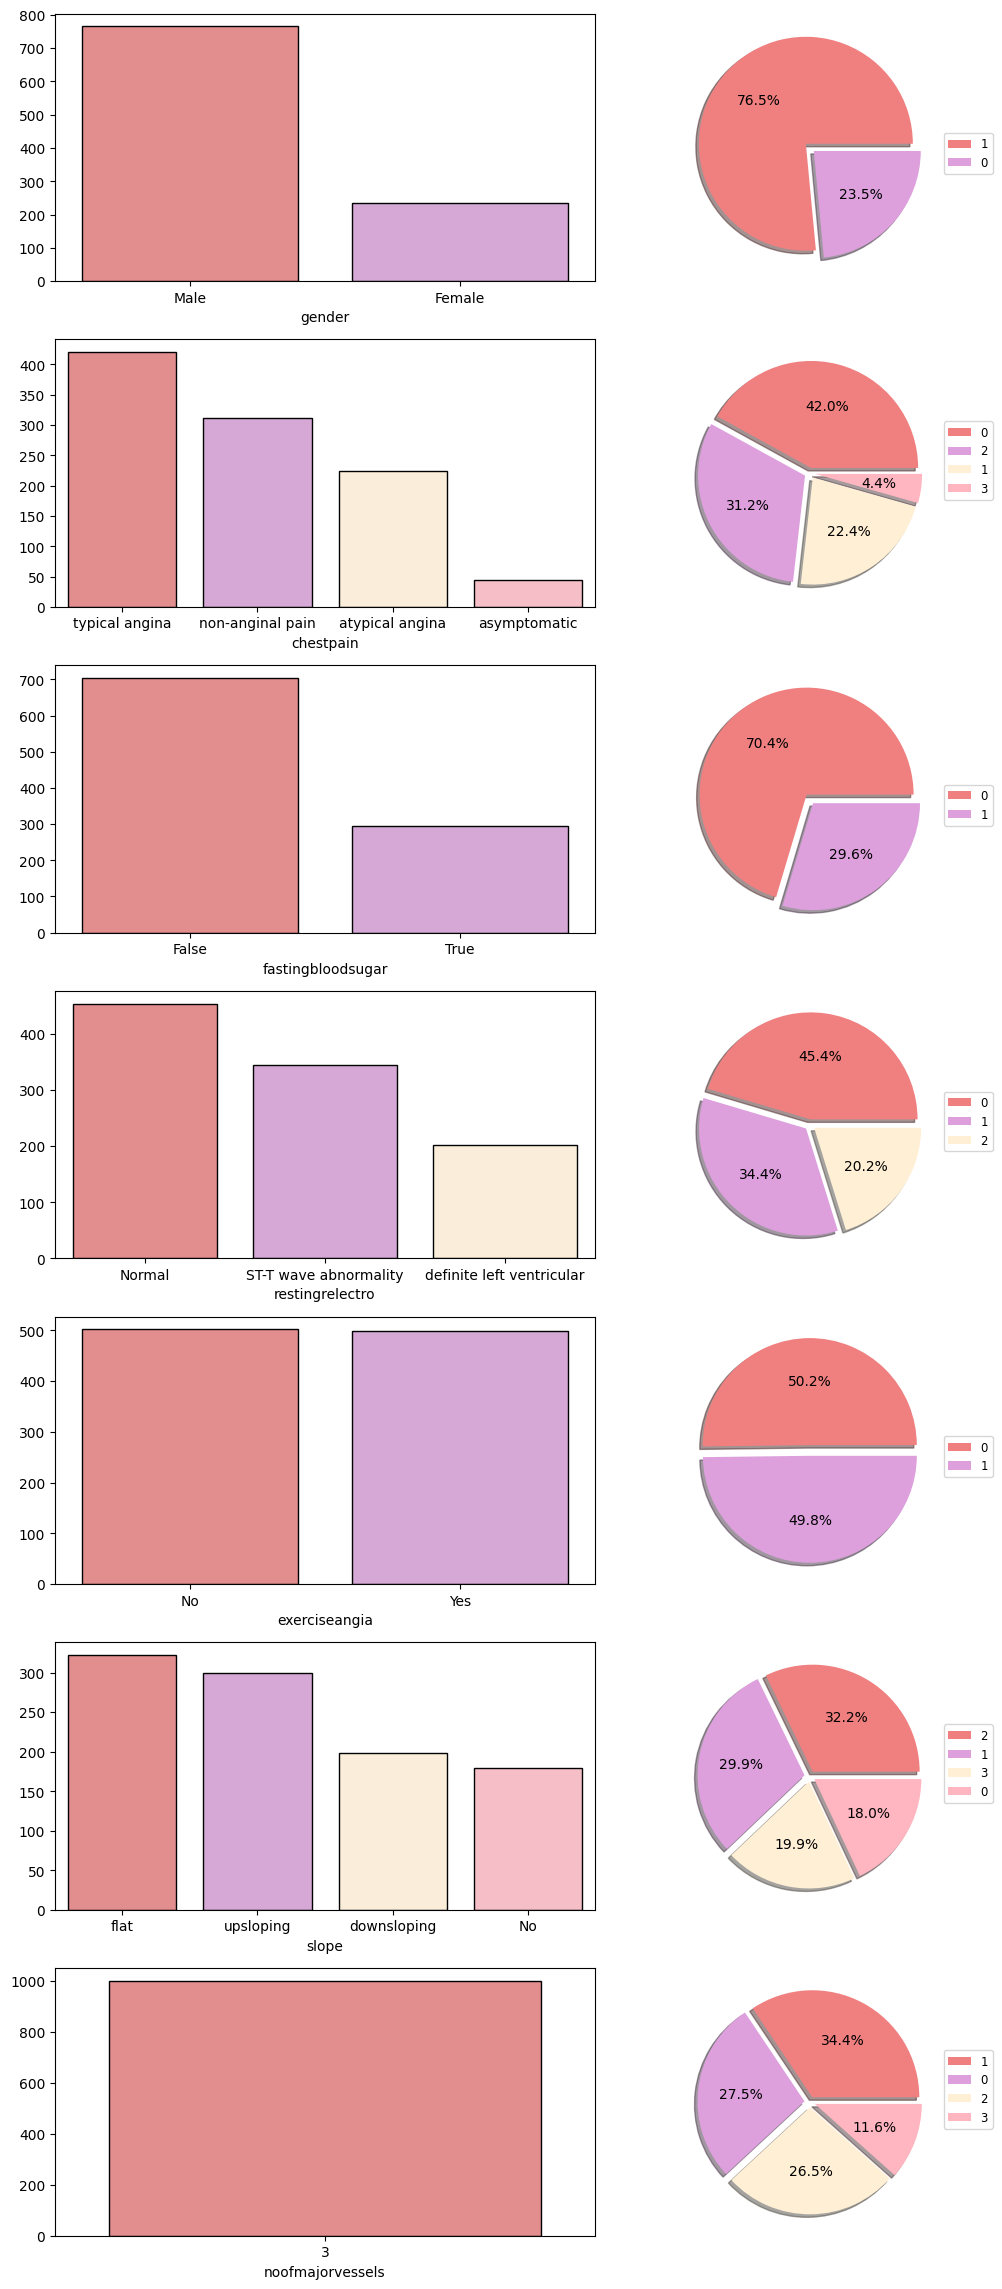

In [19]:
# Counts and Ratios of Categorical Variables
cat_vars = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']
cat_labels = {
              'gender':{0:'Female',1:'Male'}, 
              'chestpain':{0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'},
              'fastingbloodsugar':{0:'False',1:'True'},
              'restingrelectro':{0:'Normal',1:'ST-T wave abnormality',2:'definite left ventricular'},
              'exerciseangia':{0:'No',1:'Yes'},
              'slope':{0:'No',1:'upsloping',2:'flat',3:'downsloping'},
              'noofmajorvessels':[0,1,2,3]
              }

custom_colors = ['lightcoral', 'plum', 'papayawhip', 'lightpink']

plt.figure(figsize=(11,23))
j = 1
for i in cat_vars:
    label_col = df[i].replace(cat_labels[i]) if i in cat_labels else df[i]
    plt.subplot(7,2, j)
    sns.barplot(x=label_col.value_counts().index, 
                y=label_col.value_counts(), 
                palette=custom_colors,
                edgecolor='black')
    plt.ylabel("")
    plt.subplot(7,2, j+1)
    plt.pie(df[i].value_counts(), 
            explode=0.05 * np.ones(len(df[i].value_counts())), 
            shadow=True, 
            autopct='%0.1f%%', 
            colors=custom_colors)
    j = j +2
    plt.legend(labels=df[i].value_counts().index, loc=(1,0.4), fontsize="small")
plt.tight_layout()
plt.show()

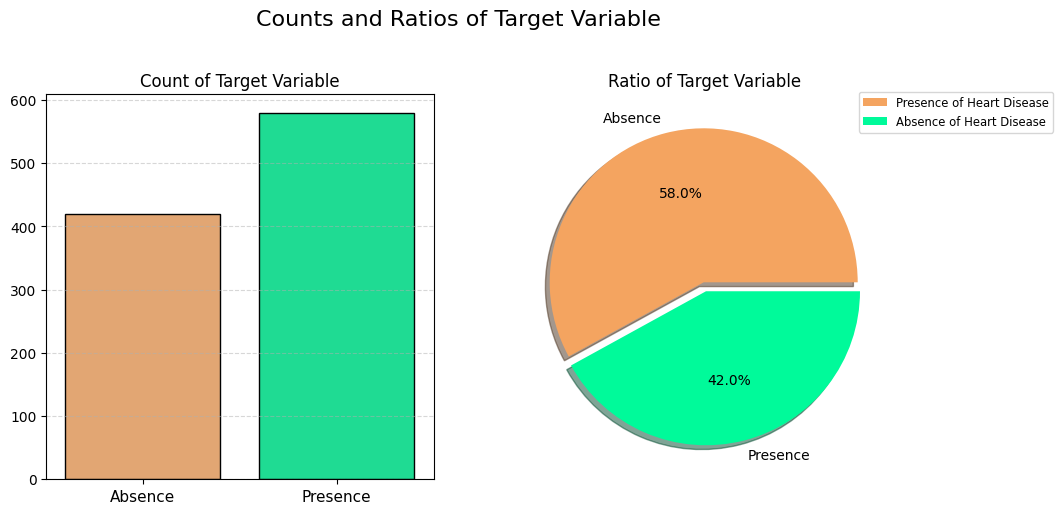

In [20]:
# Counts and ratios of target variable
plt.figure(figsize=(11, 5))
plt.subplot(1,2,1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.barplot(x=df['target'].value_counts().index, 
            y=df['target'].value_counts(), 
            palette=['sandybrown', 'mediumspringgreen'],
            edgecolor='black')
plt.xticks([0, 1], ["Absence", "Presence"], fontsize=11)
plt.title("Count of Target Variable", fontsize=12)
plt.xlabel("")
plt.ylabel("")

plt.subplot(1,2,2)
plt.pie(x=df['target'].value_counts(), 
        labels=['Absence', 'Presence'], 
        explode=[0.03,0.03], 
        autopct="%0.1f%%", 
        shadow=True, 
        colors=['sandybrown', 'mediumspringgreen'])
plt.title("Ratio of Target Variable", fontsize=12)
plt.legend(labels=["Presence of Heart Disease", "Absence of Heart Disease"], 
           loc=(0.9,0.9), fontsize="small")

plt.suptitle("Counts and Ratios of Target Variable", fontsize=16, y=1.05)
plt.show()

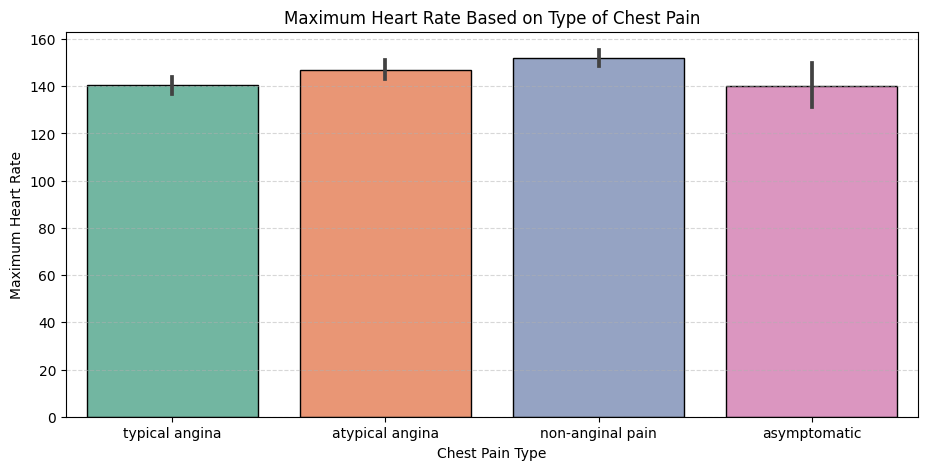

In [21]:
# Maximum heart rate based on type of chest pain 
plt.figure(figsize=(11, 5))
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.barplot(x='chestpain', 
            y='maxheartrate', 
            data=df, 
            palette='Set2', 
            edgecolor='black')
plt.title('Maximum Heart Rate Based on Type of Chest Pain')
plt.xticks([0,1,2,3], ['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

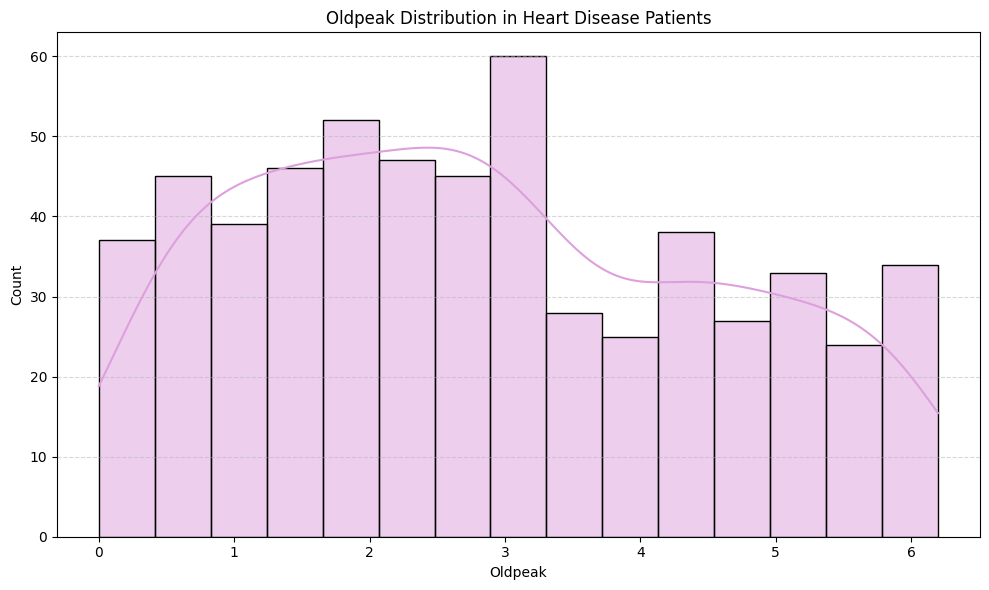

In [22]:
# Oldpeak distribution in heart disease patients
plt.figure(figsize=(10, 6))
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.histplot(x='oldpeak', data=df[df['target'] == 1], bins=15, kde=True, color='plum')
plt.title('Oldpeak Distribution in Heart Disease Patients')
plt.xlabel('Oldpeak')
plt.tight_layout()
plt.show()

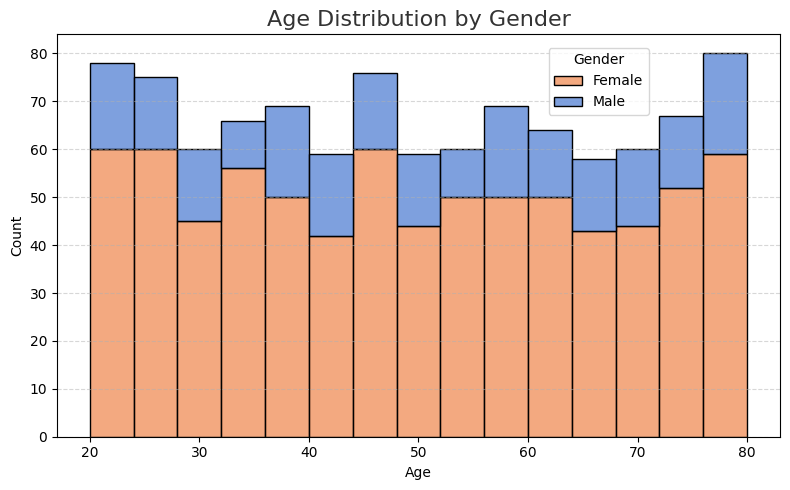

In [23]:
# Age distribution by gender
plt.figure(figsize=(8, 5))
sns.histplot(x='age', hue='gender', data=df, palette='muted', multiple='stack', bins=15, alpha=0.7)
plt.title('Age Distribution by Gender', fontsize=16, alpha=0.8)
plt.xlabel('Age')
plt.legend(title='Gender', labels=['Female', 'Male'], loc=(0.68,0.8))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

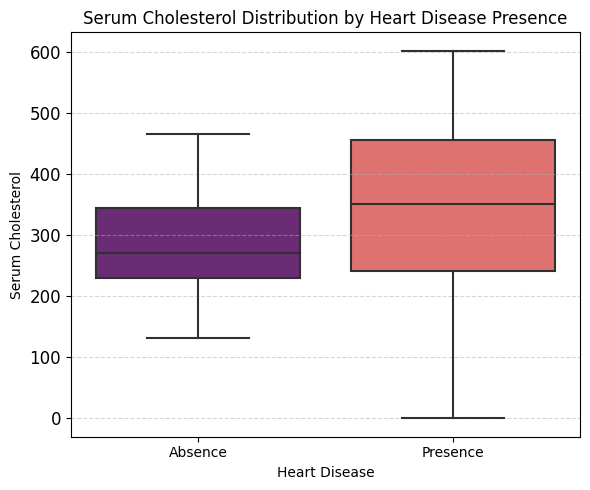

In [24]:
# Serum cholesterol distribution by heart disease presence
plt.figure(figsize=(6, 5))
sns.boxplot(x='target', y='serumcholestrol', data=df, palette='magma')
plt.title('Serum Cholesterol Distribution by Heart Disease Presence', fontsize=12)
plt.xlabel('Heart Disease')
plt.ylabel('Serum Cholesterol')
plt.xticks([0, 1], ['Absence', 'Presence'], fontsize=10)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

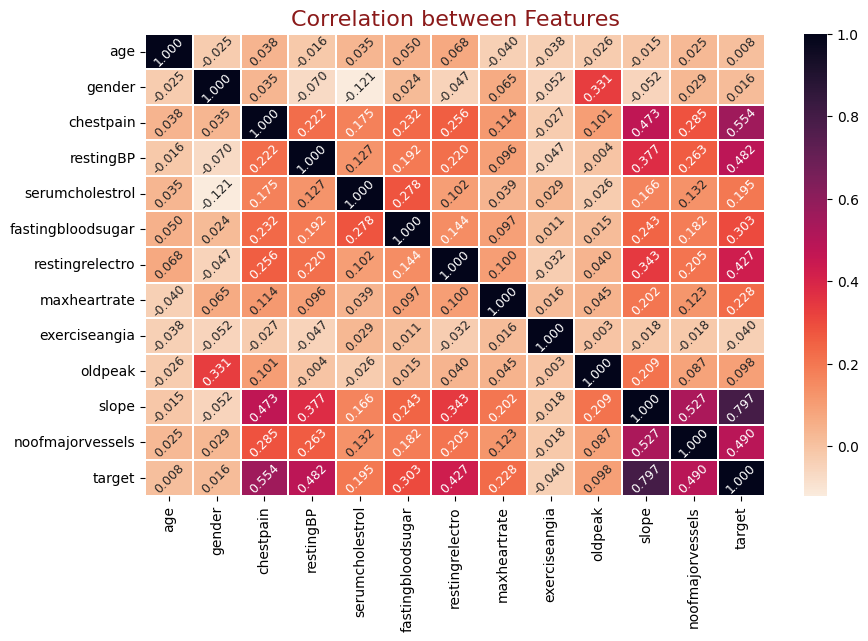

In [25]:
# Correaltion table
plt.figure(figsize=(10,6))
sns.heatmap(
            df.drop("patientid", axis=1).corr(),
            linewidths=0.05,
            annot=True,
            annot_kws={"size": 9, "rotation": 45},
            fmt=".3f",
            cmap="rocket_r",
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation between Features", fontsize=16, color="#8b1a1a")
plt.show()

# Feature Selection

In [26]:
# Independet or feature variable
X = df.drop(['patientid','target'], axis=1)
X.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
0,53,1,2,171,0,0,1,147,0,5.3,3,3
1,40,1,0,94,229,0,1,115,0,3.7,1,1
2,49,1,2,133,142,0,0,202,1,5.0,1,0
3,43,1,0,138,295,1,1,153,0,3.2,2,2
4,31,1,1,199,0,0,2,136,0,5.3,3,2


In [27]:
# Dependent or target variable
y = df['target']
y.head()

0    1
1    0
2    0
3    1
4    1
Name: target, dtype: int64

# Train and Test set split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Features of train set
X_train.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
541,71,1,2,186,544,1,1,150,1,4.3,3,3
440,70,1,1,196,404,1,0,130,1,1.2,3,1
482,77,1,0,110,254,0,0,186,0,2.0,1,1
422,36,1,1,132,307,0,0,175,0,5.3,0,0
778,76,1,2,135,325,0,0,120,0,2.3,0,0


In [30]:
# Features of test set
X_test.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
521,44,1,0,147,487,0,1,179,0,3.1,2,1
737,29,1,0,152,138,0,0,199,1,0.0,0,0
740,72,0,1,156,411,0,0,186,0,0.1,1,2
660,67,1,0,165,234,0,0,168,1,5.6,1,1
411,64,0,2,97,0,0,1,186,1,1.8,3,1


In [31]:
# Target of train set
y_train.head()

541    1
440    1
482    0
422    0
778    0
Name: target, dtype: int64

In [32]:
# Target of test set
y_test.head()

521    1
737    0
740    0
660    0
411    1
Name: target, dtype: int64

# Comparison of Models

In [33]:
classfiers = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Hist Gradient Boosting Classifier": HistGradientBoostingClassifier()
}

for name, clf in classfiers.items():
  clf.fit(X_train, y_train)
  
  y_pred = clf.predict(X_test)
  
  # Evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  
  # Calculate ROC AUC for models with predict_proba
  if hasattr(clf, "predict_proba"):
      roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
  else:
      roc_auc = roc_auc_score(y_test, clf.decision_function(X_test))  # Use decision_function for models without predict_proba

  print(f"{name} Evaluation Metrics:")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print(f"ROC AUC: {roc_auc:.4f}")
  print("\n")
  print("--"*30)
  print("\n")

Logistic Regression Evaluation Metrics:
Accuracy: 0.9467
Precision: 0.9398
Recall: 0.9630
F1-Score: 0.9512
ROC AUC: 0.9929


------------------------------------------------------------


Support Vector Classifier Evaluation Metrics:
Accuracy: 0.8333
Precision: 0.8256
Recall: 0.8765
F1-Score: 0.8503
ROC AUC: 0.8964


------------------------------------------------------------


Decision Tree Classifier Evaluation Metrics:
Accuracy: 0.9733
Precision: 0.9695
Recall: 0.9815
F1-Score: 0.9755
ROC AUC: 0.9726


------------------------------------------------------------


Hist Gradient Boosting Classifier Evaluation Metrics:
Accuracy: 0.9933
Precision: 0.9938
Recall: 0.9938
F1-Score: 0.9938
ROC AUC: 0.9999


------------------------------------------------------------




# Model Evaluation

In [34]:
# Check for class imbalance
unique, counts = np.unique(y_train, return_counts=True)
class_counts = dict(zip(unique, counts))
print(f"\nClass Distribution: \n{class_counts}")


Class Distribution: 
{0: 282, 1: 418}


In [35]:
# Apply SMOTE for imbalanced data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [36]:
# Histogram gradient boosting classifier model
model = HistGradientBoostingClassifier(random_state=42)

# Cross-validation
Kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=Kfold, scoring='roc_auc')
print(f"Cross-Validation ROC AUC Scores: {scores}")
print(f"\nMean ROC AUC: {scores.mean():.3f}")

Cross-Validation ROC AUC Scores: [0.99730726 1.         0.99971314 0.99756168 0.99928285]

Mean ROC AUC: 0.999


In [37]:
# Class imbalance
unique, counts = np.unique(y_train_resampled, return_counts=True)
class_counts = dict(zip(unique, counts))
print(f"\nClass Distribution: \n{class_counts}")


Class Distribution: 
{0: 418, 1: 418}


In [38]:
# Fit the model
model.fit(X_train_resampled, y_train_resampled)
y_pred_model = model.predict(X_test)

# Compute metrics on the test data
y_pred_proba = model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Get the feature names from the training set
feature_names = X_train.columns

# Feature importance
importance = permutation_importance(model, X_test, y_test, scoring='roc_auc')
sorted_importance = pd.Series(importance.importances_mean, index=feature_names).sort_values(ascending=False)
print(f"\nFeature Importance:\n{sorted_importance}")


Feature Importance:
slope                0.209322
serumcholestrol      0.005216
chestpain            0.004026
restingBP            0.003596
oldpeak              0.002308
maxheartrate         0.001834
gender               0.000921
restingrelectro      0.000859
noofmajorvessels     0.000259
fastingbloodsugar    0.000161
age                  0.000072
exerciseangia        0.000018
dtype: float64


# Hyperparameter Tuning

In [39]:
# Define hyperparameter search space
param_dist = {
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': range(3, 8),
    'max_iter': range(50, 200, 50),
}

hsb = HistGradientBoostingClassifier(random_state=42)

# RandomizedSearchCV
search = RandomizedSearchCV(model, param_dist, n_iter=50, scoring='roc_auc', cv=5, random_state=42)

# Fit the search object on the resampled data
search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and score
print("Best Hyperparameters:", search.best_params_)
print("Best Cross-Validation ROC AUC:", search.best_score_)

# Use the best model for prediction
best_model = search.best_estimator_
y_pred_hsb = best_model.predict(X_test)

Best Hyperparameters: {'max_iter': 150, 'max_depth': 7, 'learning_rate': 0.1}
Best Cross-Validation ROC AUC: 0.9982795126082562


In [40]:
best_model.fit(X_train_resampled, y_train_resampled)

importance = permutation_importance(best_model, X_test, y_test, scoring='roc_auc')
sorted_importance = pd.Series(importance.importances_mean, index=X_test.columns).sort_values(ascending=False)

print("Feature Importance (After Hyperparameter Tuning):")
print(sorted_importance)

Feature Importance (After Hyperparameter Tuning):
slope                0.219923
serumcholestrol      0.004554
oldpeak              0.003095
restingBP            0.002612
chestpain            0.002362
maxheartrate         0.001458
restingrelectro      0.000769
gender               0.000510
fastingbloodsugar    0.000376
noofmajorvessels     0.000268
exerciseangia        0.000063
age                  0.000054
dtype: float64


# Confusion Matrix

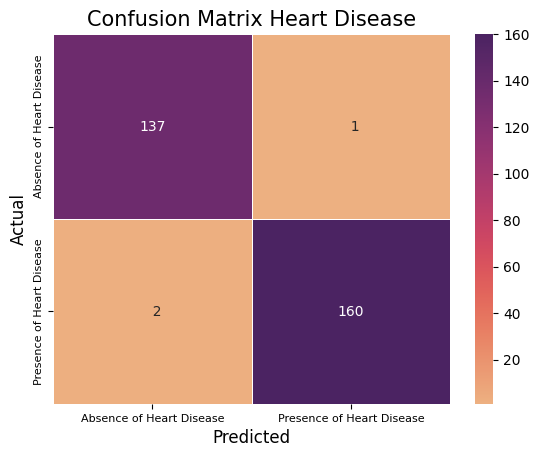

In [41]:
sns.heatmap(confusion_matrix(y_test, y_pred_hsb), annot=True, fmt='3g', linewidths=0.6, cmap="flare")
plt.title("Confusion Matrix Heart Disease", fontsize=15)
plt.xticks(ticks=[0.5, 1.5], labels=["Absence of Heart Disease", "Presence of Heart Disease"], fontsize=8)
plt.yticks(ticks=[0.5, 1.5], labels=["Absence of Heart Disease", "Presence of Heart Disease"], fontsize=8)
plt.xlabel("Predicted", fontsize=12)
plt.ylabel("Actual", fontsize=12)
plt.show()

# Classification Report

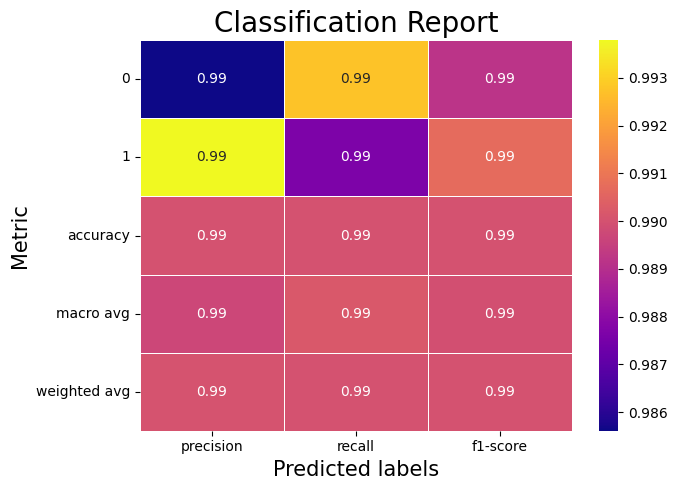

In [42]:
cm = confusion_matrix(y_test, y_pred_hsb)
cr = pd.DataFrame(classification_report(y_test, y_pred_hsb, digits=3, output_dict=True)).T
cr.drop(columns='support', inplace=True)

plt.figure(figsize=(7, 5))
sns.heatmap(cr, cmap='plasma', annot=True, linecolor='white', linewidths=0.5)
plt.xlabel('Predicted labels', fontsize=15)
plt.ylabel('Metric', fontsize=15) 
plt.title('Classification Report', fontsize=20)
plt.tight_layout()
plt.show()

# ROC Curve

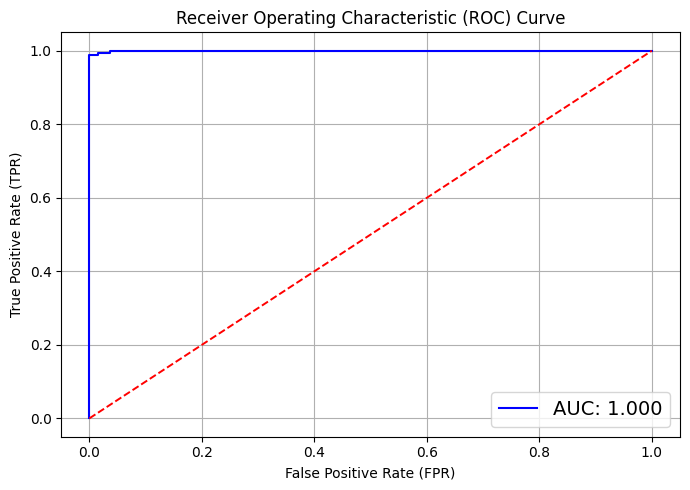

In [43]:
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color="blue", label=f"AUC: {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], color="red", linestyle="--", linewidth=1.4)
plt.legend(fontsize=14)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.grid(True)
plt.tight_layout()
plt.show()

# Save the model

In [44]:
joblib.dump(best_model, 'model.joblib')

['model.joblib']

# Load the model

In [45]:
model = joblib.load("model.joblib")

# Prediction

In [46]:
new_data = [
    [80, 1, 1, 199, 212, 0, 1, 113, 0, 0.6, 1, 0],
    [25, 1, 0, 126, 142, 0, 0, 156, 0, 2.9, 1, 1],
    [44, 0, 3, 200, 465, 0, 1, 100, 0, 1.9, 1, 1],
    [28, 1, 2, 184, 526, 1, 0, 190, 1, 5.6, 3, 2]
]

new_data = np.array(new_data)

predictions = model.predict(new_data)

for i, prediction in enumerate(predictions):
    print("Data point", i+1)
    print("Features:")
    print("Age:", new_data[i][0])
    print("Gender:", new_data[i][1])
    print("Chest Pain:", new_data[i][2])
    print("Resting BP:", new_data[i][3])
    print("Serum Cholestrol:", new_data[i][4])
    print("Fasting Blood Sugar:", new_data[i][5])
    print("Resting Electro:", new_data[i][6])
    print("Max Heart Rate:", new_data[i][7])
    print("Exercise Angia:", new_data[i][8])
    print("Old Peak:", new_data[i][9])
    print("Slope:", new_data[i][10])
    print("Number of Major Vessels:", new_data[i][11])
    print("Prediction:", "Presence of Heart Disease" if prediction == 1 else "Absence of Heart Disease")
    print("\n")
    print("--"*30)
    print("\n")

Data point 1
Features:
Age: 80.0
Gender: 1.0
Chest Pain: 1.0
Resting BP: 199.0
Serum Cholestrol: 212.0
Fasting Blood Sugar: 0.0
Resting Electro: 1.0
Max Heart Rate: 113.0
Exercise Angia: 0.0
Old Peak: 0.6
Slope: 1.0
Number of Major Vessels: 0.0
Prediction: Presence of Heart Disease


------------------------------------------------------------


Data point 2
Features:
Age: 25.0
Gender: 1.0
Chest Pain: 0.0
Resting BP: 126.0
Serum Cholestrol: 142.0
Fasting Blood Sugar: 0.0
Resting Electro: 0.0
Max Heart Rate: 156.0
Exercise Angia: 0.0
Old Peak: 2.9
Slope: 1.0
Number of Major Vessels: 1.0
Prediction: Absence of Heart Disease


------------------------------------------------------------


Data point 3
Features:
Age: 44.0
Gender: 0.0
Chest Pain: 3.0
Resting BP: 200.0
Serum Cholestrol: 465.0
Fasting Blood Sugar: 0.0
Resting Electro: 1.0
Max Heart Rate: 100.0
Exercise Angia: 0.0
Old Peak: 1.9
Slope: 1.0
Number of Major Vessels: 1.0
Prediction: Absence of Heart Disease


---------------------

# Feedback Required

<div style="background-color: #cdecfd; padding: 10px; font-size: 18px;">
Hey there! 🌟 Your feedback means the world to me as I embark on my coding journey. Every comment, upvote, and suggestion inspires me to keep learning and growing. Your support creates a warm and welcoming community where beginners like me feel valued and encouraged. Thank you for taking the time to share your thoughts and help me improve. Together, we're making progress one step at a time! 🚀
</div>